![](https://i.imgur.com/0AUxkXt.png)

# SF Salaries Exercise 

Explore San Francisco city employee salary data.

## Overview

One way to understand how a city government works is by looking at who it employs and how its employees are compensated. This data contains the names, job title, and compensation for San Francisco city employees on an annual basis from 2011 to 2014.



Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

## Resourses

[Pandas API Reference](https://pandas.pydata.org/pandas-docs/stable/api.html)

[NumPy Reference](https://docs.scipy.org/doc/numpy/reference/)

[Visualization with Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)


**Import libraries**

In [1]:
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt
import pandas as pd

**Read `Salaries.csv` as a dataframe called `sal`.**

In [2]:
# link = "https://s3-ap-southeast-1.amazonaws.com/intro-to-ml-minhdh/Salaries.csv"
sal = pd.read_csv('Salaries.csv')

**Check the head of the DataFrame.**

In [3]:
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


**Use the .info() method to find out how many entries there are.**

In [4]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


**What is the average BasePay ?**

Keyword: [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)

In [5]:
sal.BasePay.mean()

66325.44884050643

**What is the lowest and highest amount of BasePay?**

Keyword: 
[min](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html) , 
[max](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html)

In [6]:
print(sal.BasePay.min())

-166.01


In [7]:
print(sal.BasePay.max())

319275.01


**How about OvertimePay in the dataset? What is the average, lowest, highest amount?**

In [8]:
print('Average:',sal.OvertimePay.mean(),'Lowest:',sal.OvertimePay.min(),'Highest:',sal.OvertimePay.max())
print('OvertimePay in dataset:')
print(sal.OvertimePay.head())

Average: 5066.059886444622 Lowest: -0.01 Highest: 245131.88
OvertimePay in dataset:
0         0.00
1    245131.88
2    106088.18
3     56120.71
4      9737.00
Name: OvertimePay, dtype: float64


**What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll).**

In [9]:
print(sal.JobTitle[sal.EmployeeName == 'JOSEPH DRISCOLL'])

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object


In [10]:
# Now try to select Employees who have name "GARY JIMENEZ"
# Your code here
sal[sal.EmployeeName == 'GARY JIMENEZ']

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN


**How much does JOSEPH DRISCOLL make (including benefits)?**

In [11]:
sal.TotalPayBenefits[sal.EmployeeName == 'JOSEPH DRISCOLL']

24    270324.91
Name: TotalPayBenefits, dtype: float64

**What is the name of highest paid person (including benefits)?**

In [12]:
sal_max = sal.TotalPayBenefits.max()
sal_max
sal.EmployeeName[sal.TotalPayBenefits == sal_max]

0    NATHANIEL FORD
Name: EmployeeName, dtype: object

In [13]:
#Cách 2
sal.nlargest(1, "TotalPayBenefits")

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


**What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [14]:
sal_min = sal.TotalPayBenefits.min()
sal_min
sal.EmployeeName[sal.TotalPayBenefits == sal_min]
#sal[148653]

148653    Joe Lopez
Name: EmployeeName, dtype: object

In [15]:
sal.loc[148653]

Id                                      148654
EmployeeName                         Joe Lopez
JobTitle            Counselor, Log Cabin Ranch
BasePay                                      0
OvertimePay                                  0
OtherPay                               -618.13
Benefits                                     0
TotalPay                               -618.13
TotalPayBenefits                       -618.13
Year                                      2014
Notes                                      NaN
Agency                           San Francisco
Status                                     NaN
Name: 148653, dtype: object

In [16]:
#Cách 2
sal.nsmallest(1, "TotalPayBenefits")

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


In [17]:
print('Cô ấy có dòng tiền âm, có vẻ đã phải bồi thường gì đó và là nhân viên mới nên chưa có lương')

Cô ấy có dòng tiền âm, có vẻ đã phải bồi thường gì đó và là nhân viên mới nên chưa có lương


In [18]:
sal.head(5)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


**What was the average (mean) BasePay of all employees per year? (2011-2014) ?**
Keyword: _groupby_

In [19]:
sal2 = sal.groupby('Year').mean()
sal2.BasePay

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

**How many unique job titles are there?**

Keyword: _unique, nunique_

In [20]:
arr = sal.JobTitle.unique()
print('Unique job titles: ', arr)
print('------------------------------')
print('Count Unique job titles:')
print(sal.JobTitle.nunique())

Unique job titles:  ['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY'
 'CAPTAIN III (POLICE DEPARTMENT)' 'WIRE ROPE CABLE MAINTENANCE MECHANIC'
 ... 'Conversion' 'Cashier 3' 'Not provided']
------------------------------
Count Unique job titles:
2159


**What are the top 5 most common jobs?**

Keyword: *value_counts*

In [21]:
temp = sal.JobTitle.value_counts()
temp.head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

**How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)**

In [22]:
#Dataframe Sal1 sẽ là số lượng count của sal ở năm 2013
sal1 = sal[sal.Year == 2013].JobTitle.value_counts()
#Đếm số lượng trong dataframe có bao nhiêu sal1 có job duy nhất
len(sal1[sal1 == 1])

202

**How many people have the word Chief in their job title?**

In [23]:
#Boolean chuỗi string Chief có trong dataframe
sal0 = sal.JobTitle.str.contains('Chief')
#Đếm số lượng trong dataframe là True
len(sal0[sal0 == True])

423

## Data Visualization

**Implement seaborn's countplot with x='Year'**

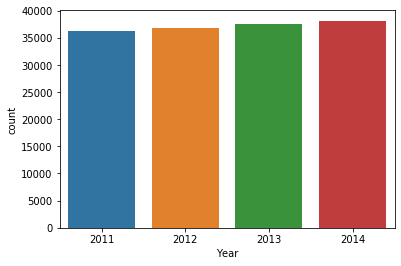

In [24]:
sns.countplot(x = 'Year',data = sal)
plt.show()

**Implement seaborn's distplot for BasePay of Year 2011**

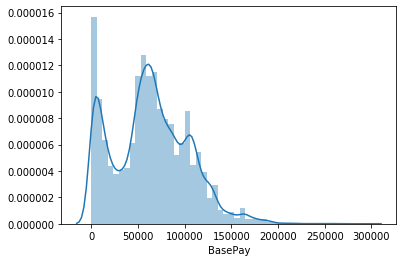

In [25]:
sns.distplot(sal[sal.Year == 2011].BasePay)

**How about other Year**

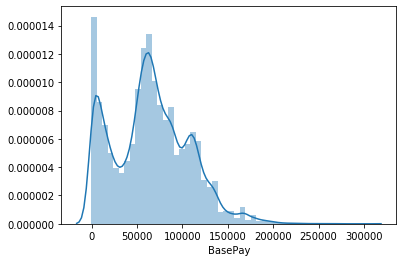

In [26]:
#2012
sns.distplot(sal[sal.Year == 2012].BasePay)

## Bonus

**Visualize top 5 Jobs with BasePay, Benefits and OvertimePay**

Keyword: *index, isin, groupby, mean, plot*

In [27]:
#Tạo từng df với kiểu sal đã sort lớn nhất theo từng mục
sal_1 = sal.sort_values('BasePay',ascending = False).reset_index().head(5)
sal_2 = sal.sort_values('Benefits',ascending = False).reset_index().head(5)
sal_3 = sal.sort_values('OvertimePay',ascending = False).reset_index().head(5)

In [29]:
sal_1

,index,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,72925,72926,Gregory P Suhr,Chief of Police,319275.01,0.00,20007.06,86533.21,339282.07,425815.28,2013,NaN,San Francisco,NaN
1,110532,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,NaN,San Francisco,NaN
2,72929,72930,Robert L Shaw,"Dep Dir for Investments, Ret",315572.01,0.00,0.00,82849.66,315572.01,398421.67,2013,NaN,San Francisco,NaN
3,72926,72927,Joanne M Hayes-White,"Chief, Fire Department",313686.01,0.00,23236.00,85431.39,336922.01,422353.40,2013,NaN,San Francisco,NaN
4,72931,72932,Harlan L Kelly-Jr,Executive Contract Employee,313312.52,0.00,0.00,82319.51,313312.52,395632.03,2013,NaN,San Francisco,NaN


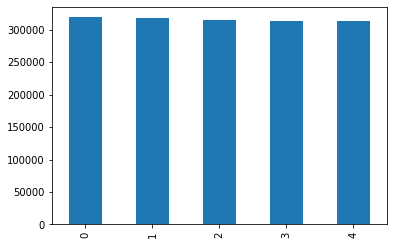

In [28]:
sal_1['BasePay'].plot(kind='bar')

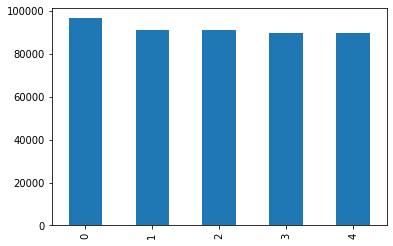

In [30]:
sal_2.Benefits.plot(kind='bar')

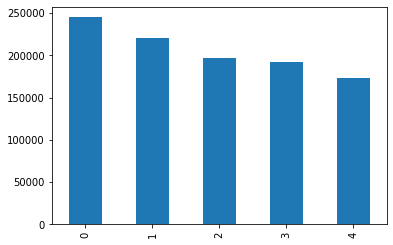

In [31]:
sal_3.OvertimePay.plot(kind='bar')

**Fun Fact: Is there a correlation between length of the Job Title string and Salary?**

*Hint: corr()*

In [35]:
sal.corr(method = 'pearson')

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
Id,1.000000,-0.204878,-0.081505,-0.100403,-0.348957,-0.211478,-0.092190,0.968171,NaN,NaN
BasePay,-0.204878,1.000000,0.266740,0.285655,0.918028,0.954494,0.946595,0.033751,NaN,NaN
OvertimePay,-0.081505,0.266740,1.000000,0.316592,0.301207,0.504859,0.467981,0.027887,NaN,NaN
OtherPay,-0.100403,0.285655,0.316592,1.000000,0.233178,0.470496,0.422341,-0.002499,NaN,NaN
Benefits,-0.348957,0.918028,0.301207,0.233178,1.000000,0.884097,0.930140,-0.043136,NaN,NaN
TotalPay,-0.211478,0.954494,0.504859,0.470496,0.884097,1.000000,0.977313,0.032090,NaN,NaN
TotalPayBenefits,-0.092190,0.946595,0.467981,0.422341,0.930140,0.977313,1.000000,0.151947,NaN,NaN
Year,0.968171,0.033751,0.027887,-0.002499,-0.043136,0.032090,0.151947,1.000000,NaN,NaN
Notes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Great Job!